In [13]:
#hw1
#Lauren Doll

#Question 1

import pandas as pd
import numpy as np

import matplotlib
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [29]:
url= r'https://raw.githubusercontent.com/ledoll/telling_stories_with_data/master/assignments/data/hw1_test_data.csv'
df = pd.read_csv(url, sep=',')
df.head()

,Unnamed: 0,x,y
0,0,0.969386,0.050518
1,1,0.543107,0.795078
2,2,0.563839,0.266660
3,3,0.158021,0.596197
4,4,0.160360,0.574742


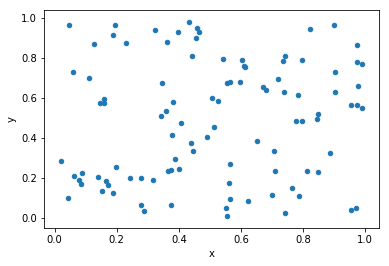

In [41]:
url= r'https://raw.githubusercontent.com/ledoll/telling_stories_with_data/master/assignments/data/hw1_test_data.csv'
data = pd.read_csv(url, sep=',')
df.plot(kind='scatter', x='x', y='y')

In [1]:
#Question Two - Simulating
import numpy as np
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [5]:
np.random.normal(size=10)

array([-0.13244541, -0.2398528 ,  0.71041841,  1.95595763,  0.86147155,
        0.90108535,  1.45120642, -1.61917408,  1.16547971, -0.21915922])

Text(0,0.5,'y')

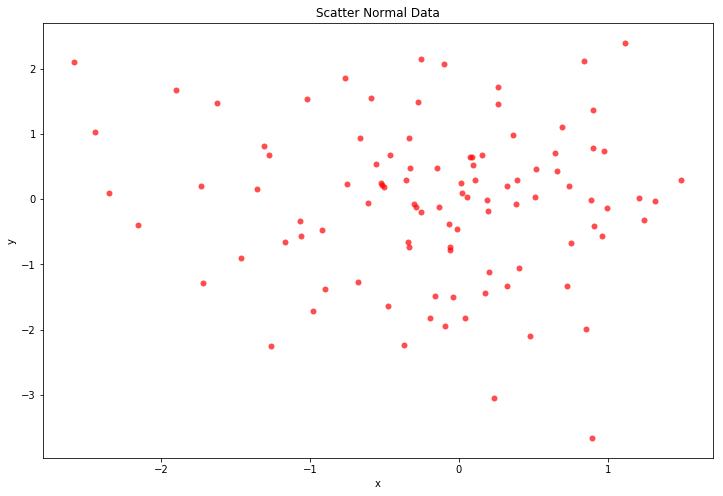

In [6]:
n = 100
x = np.random.normal(size=n)
y = np.random.normal(size=n)

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x, y, c='r', lw=0, alpha=.7)

ax.set_title('Scatter Normal Data')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [11]:
countries = ['thailand', 'myanmar', 'cambodia', 'laos']

country_probs = [0.4, 0.1, 0.3, 0.2]

country_draws = np.random.choice(countries, size=100, p=country_probs)

country_draws

array(['thailand', 'thailand', 'thailand', 'thailand', 'myanmar', 'laos',
       'thailand', 'cambodia', 'thailand', 'laos', 'cambodia', 'cambodia',
       'laos', 'laos', 'myanmar', 'thailand', 'myanmar', 'cambodia',
       'laos', 'cambodia', 'cambodia', 'thailand', 'cambodia', 'cambodia',
       'thailand', 'thailand', 'cambodia', 'thailand', 'thailand',
       'cambodia', 'thailand', 'thailand', 'cambodia', 'thailand', 'laos',
       'cambodia', 'thailand', 'thailand', 'cambodia', 'myanmar',
       'thailand', 'cambodia', 'cambodia', 'cambodia', 'cambodia',
       'myanmar', 'laos', 'thailand', 'laos', 'laos', 'laos', 'myanmar',
       'cambodia', 'cambodia', 'thailand', 'cambodia', 'cambodia',
       'thailand', 'thailand', 'thailand', 'thailand', 'thailand',
       'thailand', 'cambodia', 'thailand', 'laos', 'thailand', 'thailand',
       'laos', 'cambodia', 'thailand', 'thailand', 'thailand', 'thailand',
       'laos', 'thailand', 'cambodia', 'thailand', 'thailand', 'laos',
    

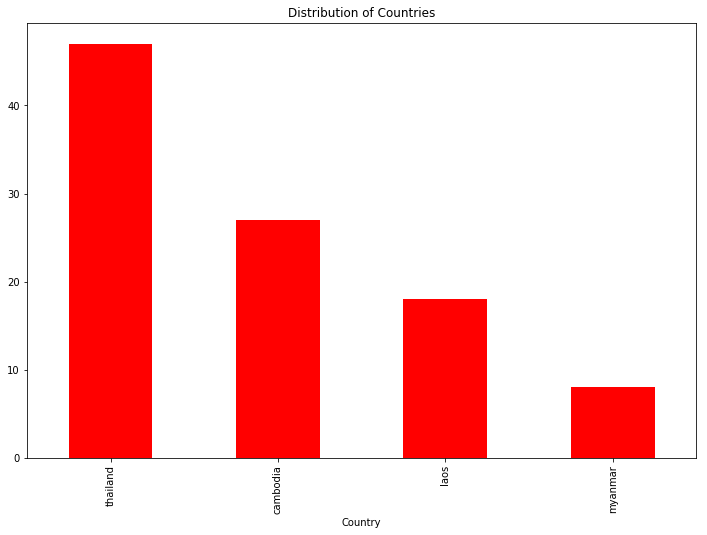

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

pd.Series(country_draws).value_counts().plot(kind='bar', ax=ax, color='r')

ax.set_title('Distribution of Countries')
ax.set_xlabel('Country')
ax.set_label('Frequency')

In [1]:
#Question 3

from IPython.display import HTML

import getpass

import requests

import json
import numpy as np
import pandas as pd

import bokeh.plotting as bp

def show_iframe(url, height=400, width=1000):
    display_string = '<iframe src={url} width={w} height={h}></iframe>'.format(url=url, w=width, h=height)
    print(display_string)
    return HTML(display_string)

show_iframe('https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000', height=100)

<iframe src=https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000 width=1000 height=100></iframe>


In [2]:
show_iframe('https://data.bls.gov/registrationEngine/')

<iframe src=https://data.bls.gov/registrationEngine/ width=1000 height=400></iframe>


In [4]:
reg_key = getpass.getpass('Enter Registration Key: ')

In [5]:
show_iframe('https://www.bls.gov/help/hlpforma.htm#CX', height=400)

<iframe src=https://www.bls.gov/help/hlpforma.htm#CX width=1000 height=400></iframe>


In [6]:
'{a}_{b}'.format(a='c', b=1)

'c_1'

In [7]:
series = 'CXUHEALTHLB0102M'

def capture_request(series, start, end, key=reg_key):
    # Define base URL (for v2)
    url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
    # Concatenate registration key
    url += '?registrationkey={key}'.format(key=key)
    # Cast data request as JSON
    data = json.dumps({
        "seriesid": [series],
        "startyear": str(start),
        "endyear": str(end)
    })
    # Capture content type of request
    headers = {
        "Content-type": "application/json"
    }
    # Request data
    result = requests.post(url, data=data, headers=headers)
    return json.loads(result.text)

json_data = capture_request(series, 2012, 2016)

json_data

{'Results': {'series': [{'data': [{'footnotes': [{}],
      'period': 'A01',
      'periodName': 'Annual',
      'value': '2156',
      'year': '2016'},
     {'footnotes': [{}],
      'period': 'A01',
      'periodName': 'Annual',
      'value': '1930',
      'year': '2015'},
     {'footnotes': [{}],
      'period': 'A01',
      'periodName': 'Annual',
      'value': '1868',
      'year': '2014'},
     {'footnotes': [{}],
      'period': 'A01',
      'periodName': 'Annual',
      'value': '1790',
      'year': '2013'},
     {'footnotes': [{}],
      'period': 'A01',
      'periodName': 'Annual',
      'value': '1677',
      'year': '2012'}],
    'seriesID': 'CXUHEALTHLB0102M'}]},
 'message': [],
 'responseTime': 52,
 'status': 'REQUEST_SUCCEEDED'}

In [8]:
# Convert to DF
df_data = pd.DataFrame(json_data['Results']['series'][0]['data'])
print(df_data)

# Retain only the values and years (convert both values to int)
df_sub = df_data[['year', 'value']].astype(int)

# Set year to index
df_sub.set_index('year', inplace=True)

# Sort index
df_sub.sort_index(inplace=True)

df_sub



  footnotes period periodName value  year
0      [{}]    A01     Annual  2156  2016
1      [{}]    A01     Annual  1930  2015
2      [{}]    A01     Annual  1868  2014
3      [{}]    A01     Annual  1790  2013
4      [{}]    A01     Annual  1677  2012


,value
year,
2012,1677
2013,1790
2014,1868
2015,1930
2016,2156


In [9]:
df_sub.loc[2014:2015]

,value
year,
2014,1868
2015,1930


In [26]:
bp.output_file('fig.html')

fig = bp.figure(plot_width=500, plot_height=300)

fig.line(df_sub.index, df_sub['value'], line_width=3, color='#890d13')

fig.title.text = "Health Expenditures for Q1 Consumers Have Increased"
fig.xaxis.axis_label = "Year"
fig.yaxis.axis_label = "Health Expenditures"

bp.save(fig)

show_iframe('fig.html', width=550, height=350)

<iframe src=fig.html width=550 height=350></iframe>
